- Nama  : Huffaz Muhammad Abdurrofi Baith
- NIM   : 1306620075
- Kelas : Fisika B
- Mata Kuliah : Pengolahan Citra Digital 

## TUGAS 7

In [8]:
import numpy as np
import scipy
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage.io import imread, imshow, show
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
image = Image.open('house.jpg')
image_rgb2gray = image.convert('L')
image_gray = np.array(image_rgb2gray)

Text(0.5, 1.0, 'Gray Image')

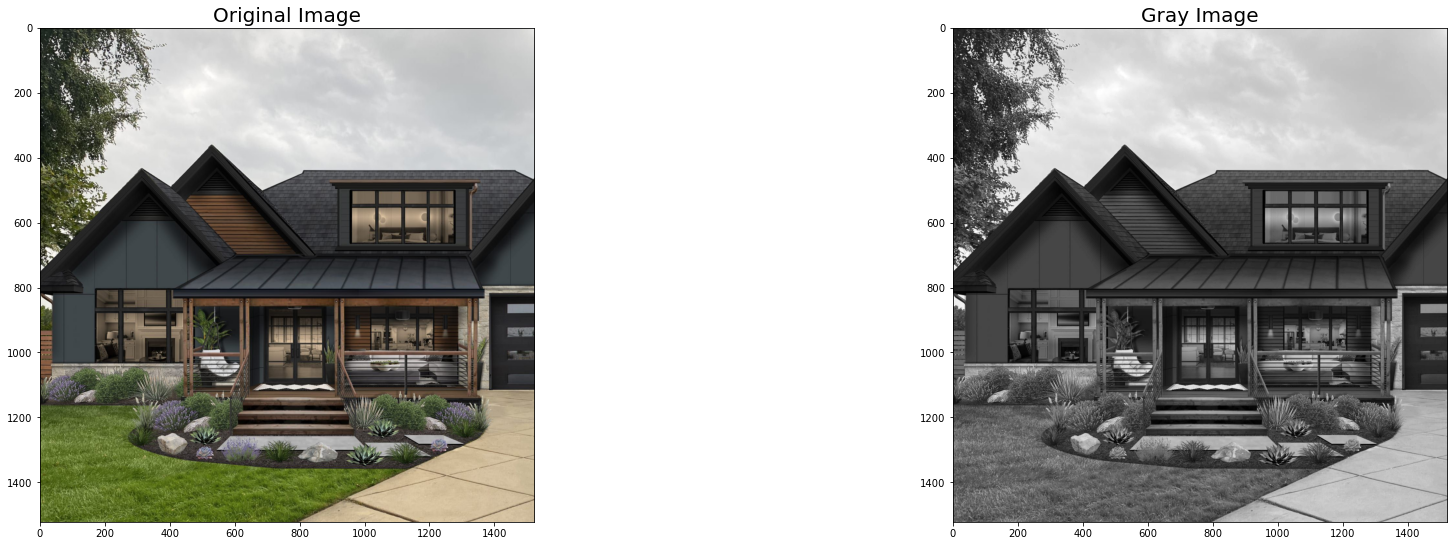

In [10]:
plt.figure(figsize=(30,20))
plt.subplot(221)
plt.imshow(image,cmap=plt.cm.gray)
plt.title('Original Image',fontsize = 20)
plt.subplot(222)
plt.imshow(image_gray,cmap=plt.cm.gray)
plt.title('Gray Image',fontsize = 20)

In [11]:
def rotate_180(array, M, N, out):
    for i in range(M):
        for j in range(N):
            out[i, N-1-j] = array[M-1-i, j]

In [12]:
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
rot_kernel90 = kernel.copy()
kernel_rotate90 = rotate_180(kernel,3,3,rot_kernel90)

rot_kernel180 = kernel.copy()
for i in range(2):
    rotate_180(rot_kernel90,3,3,rot_kernel180)
rot_kernel270 = kernel.copy()
rotate270 = rotate_180(rot_kernel180,3,3,rot_kernel270)

In [13]:
#Detection for x and y axis
conv_x = signal.convolve2d(image_gray,kernel)
conv_y = signal.convolve2d(image_gray,rot_kernel90)

#Correlation fot x and y axis
corr_x = signal.correlate2d(image_gray,kernel)
corr_y = signal.correlate2d(image_gray,rot_kernel90)

#joinin the result for x and y
fix_conv = np.sqrt(conv_x*conv_x+conv_y*conv_y)
fix_corr = np.sqrt(corr_x*corr_x+corr_y*corr_y)

#rotate correlation
rotate_corr_x = signal.correlate2d(image_gray,rot_kernel180)
rotate_corr_y = signal.correlate2d(image_gray,rot_kernel270)

fix_rotate = np.sqrt(rotate_corr_x*rotate_corr_x+rotate_corr_y*rotate_corr_y)

#prove
minus = fix_conv-fix_rotate

Text(0.5, 1.0, 'Convolution-Correlation Rotate')

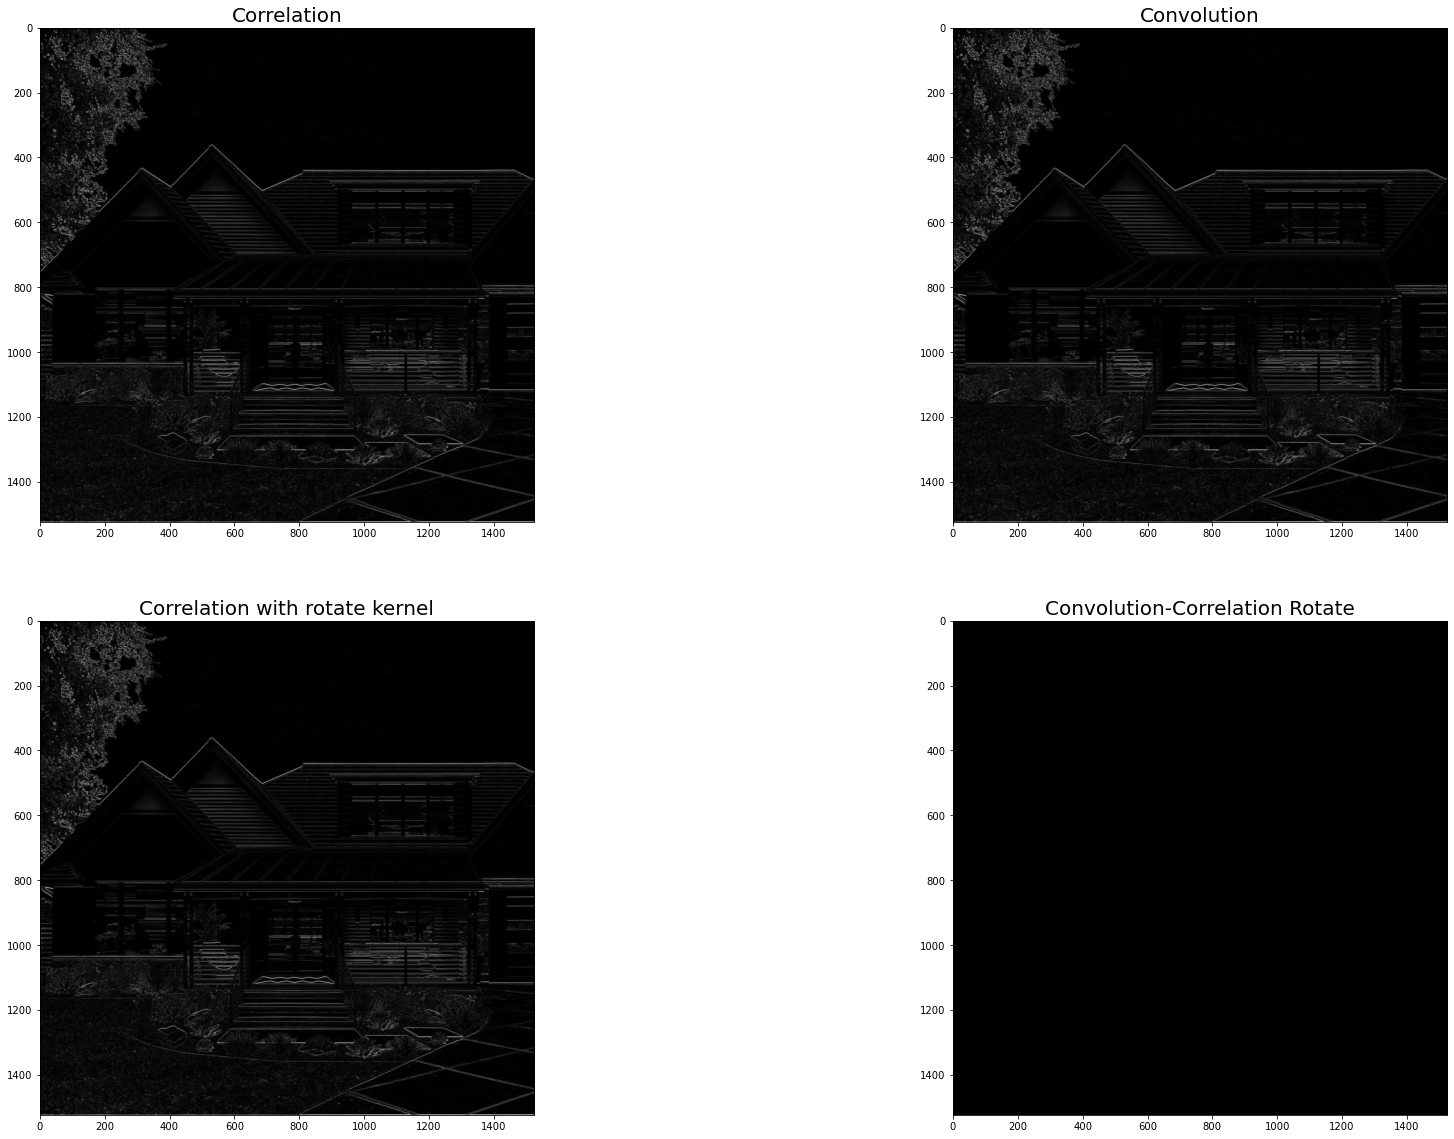

In [14]:
plt.figure(figsize=(30,20))
plt.subplot(221)
plt.imshow(fix_corr,cmap=plt.cm.gray)
plt.title('Correlation',fontsize = 20)

plt.subplot(222)
plt.imshow(fix_conv,cmap=plt.cm.gray)
plt.title('Convolution',fontsize = 20)

plt.subplot(223)
plt.imshow(fix_rotate,cmap=plt.cm.gray)
plt.title('Correlation with rotate kernel',fontsize = 20)

plt.subplot(224)
plt.imshow(minus,cmap=plt.cm.gray)
plt.title('Convolution-Correlation Rotate',fontsize = 20)

Dari hasil percobaan dimana kernel pada correlation merupakan kernel yang sama dengan 180 derajat dirotasi. Ketika dikurangi antara korelasi dengan konvolusi menghasilkan gambar hitam yang berarti nilai pixelnya 0.

In [15]:
import time
start_time = time.time()
conv_fft = signal.fftconvolve(image_gray,kernel)
conv_fft = np.sqrt(conv_fft*conv_fft)
end_time = time.time()
fft_time = end_time-start_time

In [16]:
start_time= time.time()
conv_dir = signal.convolve(image_gray,kernel)
conv_dir = np.sqrt(conv_dir*conv_dir)
end_time = time.time()
dir_time = end_time-start_time

Text(0.5, 1.0, 'Direct Convolution')

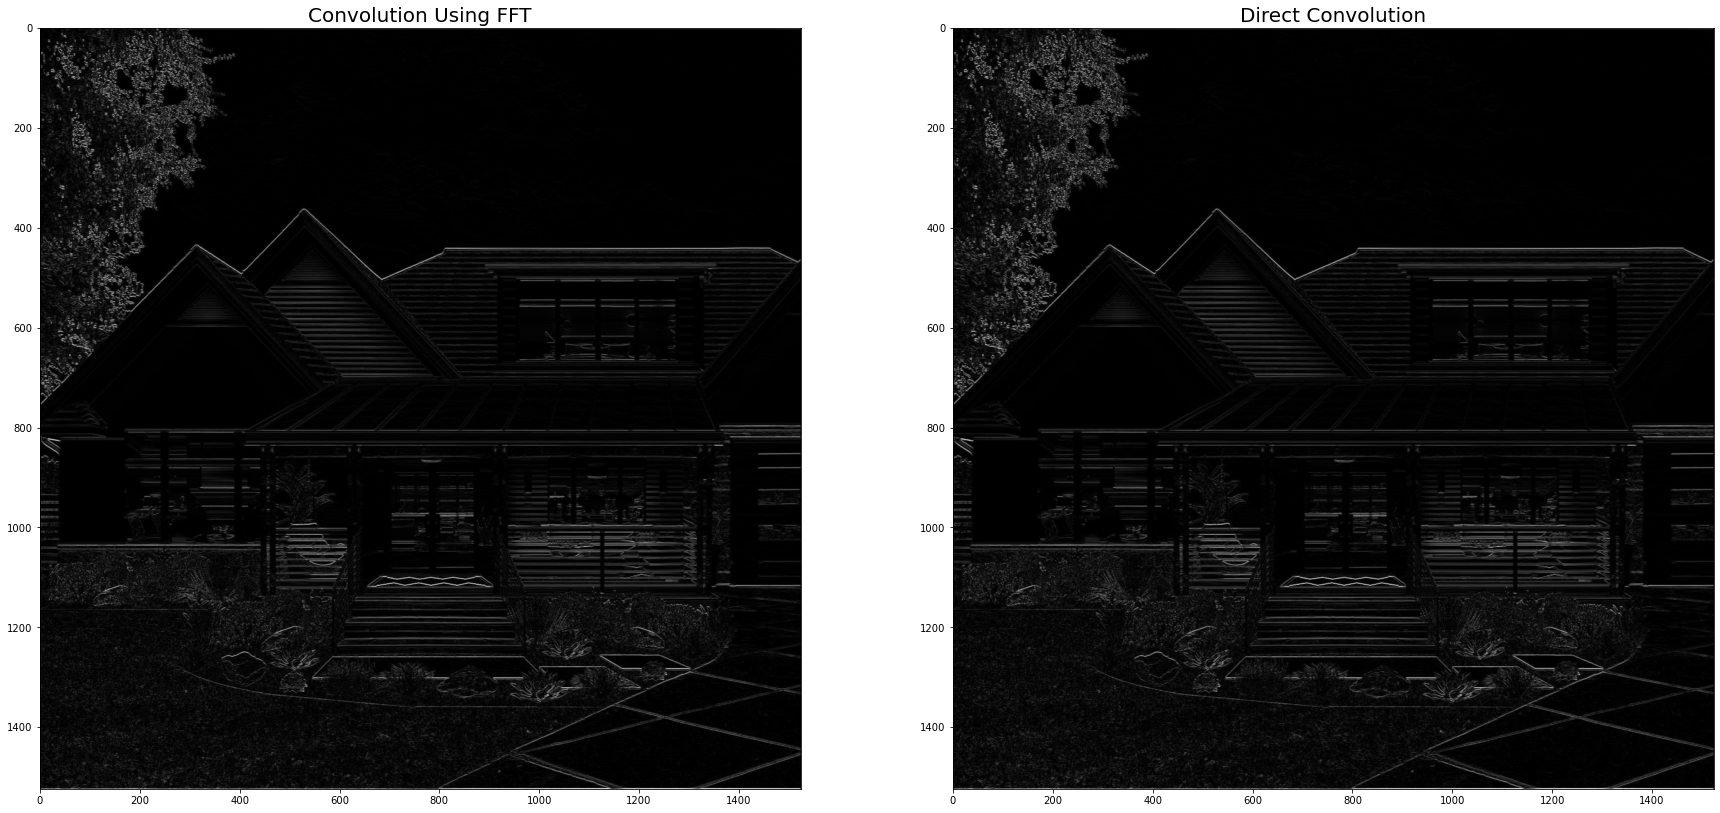

In [17]:
plt.figure(figsize=(30,20))
plt.subplot(121)
plt.imshow(conv_fft,cmap=plt.cm.gray)
plt.title('Convolution Using FFT',fontsize = 20)

plt.subplot(122)
plt.imshow(conv_dir,cmap=plt.cm.gray)
plt.title('Direct Convolution',fontsize = 20)


In [18]:
print(f'Convolution Using FFT: {fft_time:.5f}s')
print(f'Direct Convolutin: {dir_time:.5f}s')

Convolution Using FFT: 0.47867s
Direct Convolutin: 0.79048s


Dari hasil running yang diperoleh, dapat disimpulkan bahwa konvolusi menggunakan FFT bekerja lebih cepat dibanding konvolusi secara langsung